In [1]:
import pandas as pd
import networkx as nx
import statistics as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
from collections import Counter
pd.options.display.max_rows = 400

In [2]:
with open('stocknames.txt') as f:
    stock_name = f.read().splitlines() 

stock_id = list(range(0,len(stock_name)))
stock_dict = dict(zip(stock_id, stock_name))
# stock_dict

# A07.1 - Correlation MSTs

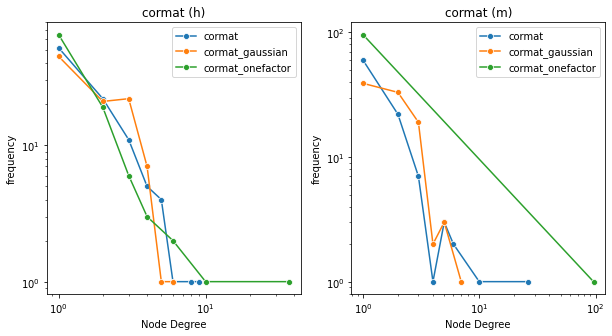

In [19]:
graph_names = ['cormat', 
               'cormat_gaussian', 'cormat_onefactor'
              ]

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))


mst_dict = dict()
col_index = 0
for sub_name in ['h', 'm']:
    
    for g_name in graph_names:
        # generate graph and tree
        
        matrix = np.load('{}_1{}.npy'.format(g_name, sub_name))
        matrix = np.sqrt(2*(1-matrix)) # correlation to distance
        G = nx.from_numpy_matrix(matrix)
        nx.set_node_attributes(G, stock_dict, 'name')
        T = nx.minimum_spanning_tree(G)
        mst_dict[g_name+'_'+sub_name] = T
        
        # calculate degree
        degree_list = [degree for name, degree in T.degree()]
        degree_counter = Counter(degree_list)
#         print(degree_counter)
        
#         total_degree = sum(degree_counter.values())
#         density = {k: v/total_degree for k, v in degree_counter.items()}
        
        # draw
        sns.lineplot(data = degree_counter, ax = axes[col_index], marker="o",dashes= False, )
        
    axes[col_index].set_yscale('log')
    axes[col_index].set_xscale('log')
    axes[col_index].set(xlabel='Node Degree',ylabel='frequency')
    axes[col_index].set_title('cormat ({})'.format(sub_name))
    axes[col_index].legend(graph_names)
        
    col_index+=1
        

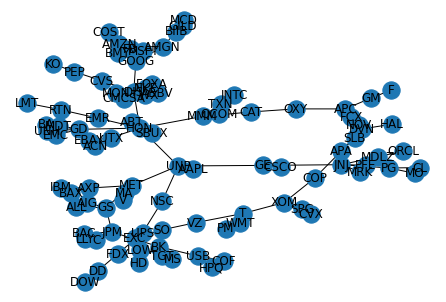

In [4]:
G = mst_dict['cormat_h']
labels = nx.get_node_attributes(G, 'name') 
nx.draw(G, labels=labels)


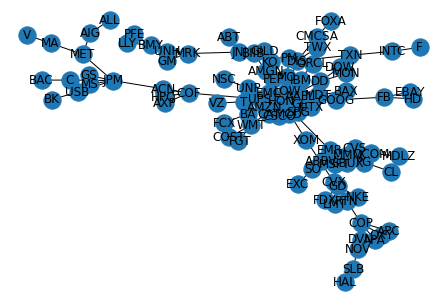

In [5]:
G = mst_dict['cormat_m']
labels = nx.get_node_attributes(G, 'name') 
nx.draw(G, labels=labels)

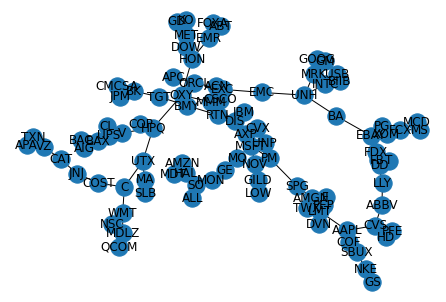

In [6]:
G = mst_dict['cormat_gaussian_h']
labels = nx.get_node_attributes(G, 'name') 
nx.draw(G, labels=labels)

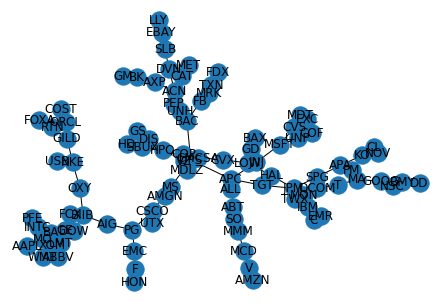

In [7]:
G = mst_dict['cormat_gaussian_m']
labels = nx.get_node_attributes(G, 'name') 
nx.draw(G, labels=labels)

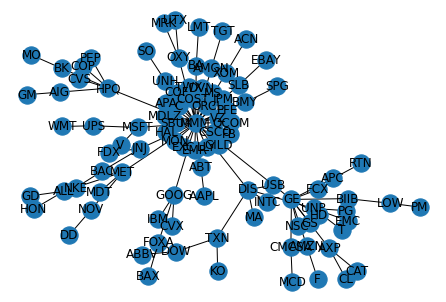

In [8]:
G = mst_dict['cormat_onefactor_h']
labels = nx.get_node_attributes(G, 'name') 
nx.draw(G, labels=labels)

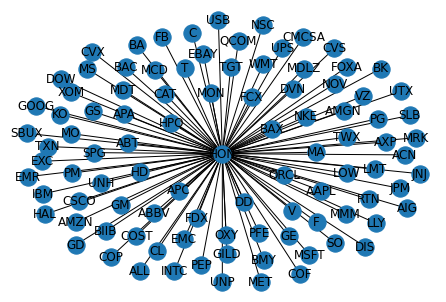

In [9]:
G = mst_dict['cormat_onefactor_m']
labels = nx.get_node_attributes(G, 'name') 
nx.draw(G, labels=labels)

# A07.2 - Conclusions

In [10]:
# top stock

def calculate_top_stock(G, degree_dict):
    top_pairs  = dict(sorted(degree_dict.items(), key=lambda item: -item[1])[:5])
    top_stock_id = list(top_pairs.keys())
    
    res = list()
    atrributes = nx.get_node_attributes(G, "name")
    for i in top_stock_id:
        res.append(atrributes[i])
    return res
        

for g_name in graph_names:
    
    for sub_name in ['h', 'm']:
        
        # generate graph and tree
        matrix = np.load('{}_1{}.npy'.format(g_name, sub_name))
        
        # eigval
        eigval, eigvec = np.linalg.eig(matrix)
#         print(sorted(eigval, reverse=True)[0:2])
        
        # correlation to distance
        matrix = np.sqrt(2*(1-matrix)) 
        
        G = nx.from_numpy_matrix(matrix)
        nx.set_node_attributes(G, stock_dict, 'name')
        T = nx.minimum_spanning_tree(G)
        
        # calculate top stock
        degree_dict = {name: degree for name, degree in T.degree()}
        top_stack_name = calculate_top_stock(G, degree_dict)
        
#         print('## {} 1{} ##'.format(g_name, sub_name))
#         print(top_stack_name)
#         print()
        

(1) Is there a‘market mode’?
- There is a market mode in both minute and hour data. 


|type|hour or minute|Top 1 eigval|Top 2 eigval|
|--|--|--|--|
|Normal|h|31.02|6.11|
|Normal|m|30.15|3.06|

(2) Which are the 5 stocks with highest degree on the 1 minute and 1 hour MST?  

|type|hour or minute|Top stock|
|--|--|--|
|Normal|h|'DIS', 'HON', 'GOOG', 'GD', 'JNJ'|
|Normal|m|'HON', 'EMR', 'COP', 'JPM', 'COF'|
|gaussian|h|'EBAY', 'MSFT', 'AAPL', 'AMGN', 'CVS'|
|gaussian|m|'JPM', 'APC', 'BIIB', 'UPS', 'ACN'|
|onefactor|h|'MMM', 'GE', 'DIS', 'HPQ', 'GOOG'|
|onefactor|m|'HON', 'AAPL', 'ABBV', 'ABT', 'ACN'|

(3) Is the degree distribution of MST squalitatively the same at1 minute and 1 hour?
- They share the similar pattern but still have some differences.

(4) Is the degree distribution of MSTs well reproduced by the null Gaussian and One-Factor models?
- The Gaussian model can explain most of the correlations in both minute and hour data. The One-factor model does not reproduce degree distribution well in minute data. 